## Importing Packages and Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings, gc, joblib

warnings.filterwarnings('ignore')
dataframe = pd.read_csv('Weather Data.csv')

## Exploratory Data Analysis

In [4]:
dataframe.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
dataframe.shape

(8784, 8)

In [7]:
dataframe.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
dataframe.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [9]:
dataframe.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [10]:
dataframe.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [11]:
dataframe.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [156]:
dataframe.describe()

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

Skewness of Temp_C: -0.17766634898276745
Kurtosis of Temp_C: -0.9155567505542197


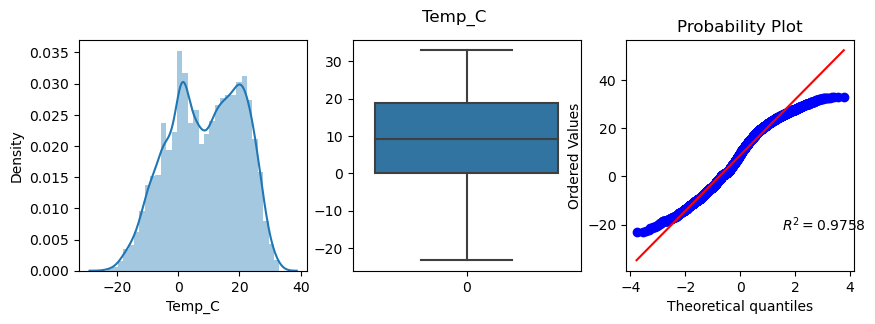

Skewness of Dew Point Temp_C: -0.31843338608156885
Kurtosis of Dew Point Temp_C: -0.8157875944814732


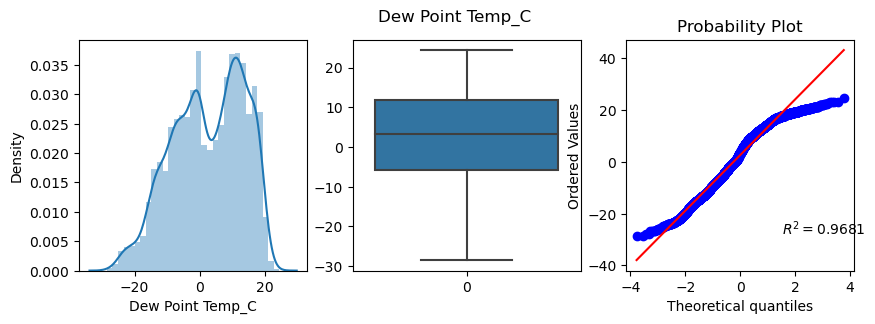

Skewness of Rel Hum_%: -0.32383026939145887
Kurtosis of Rel Hum_%: -0.5529352317433536


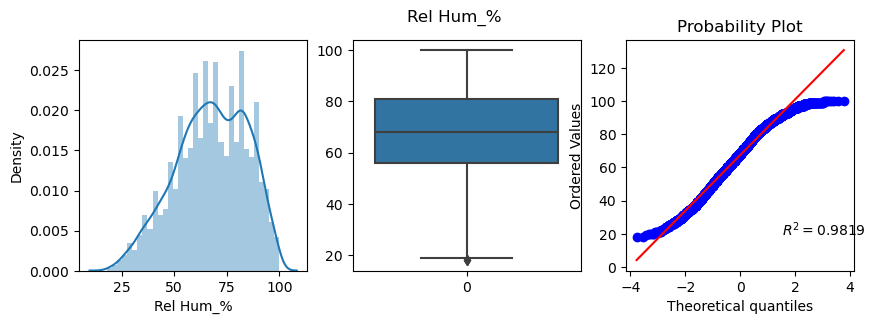

Skewness of Wind Speed_km/h: 0.8713742625776061
Kurtosis of Wind Speed_km/h: 1.5407125247939306


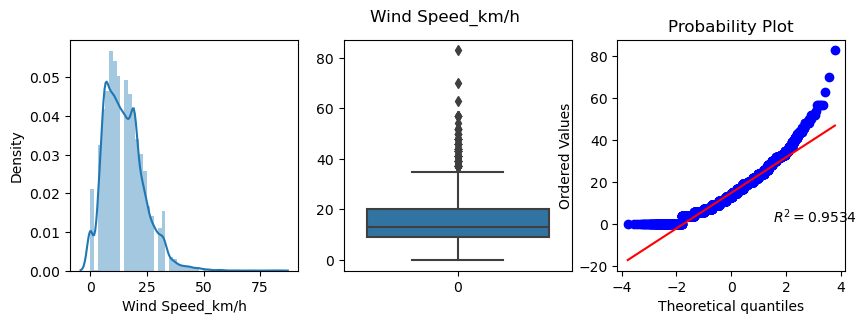

Skewness of Visibility_km: 0.41336159676061063
Kurtosis of Visibility_km: -0.35103132005897164


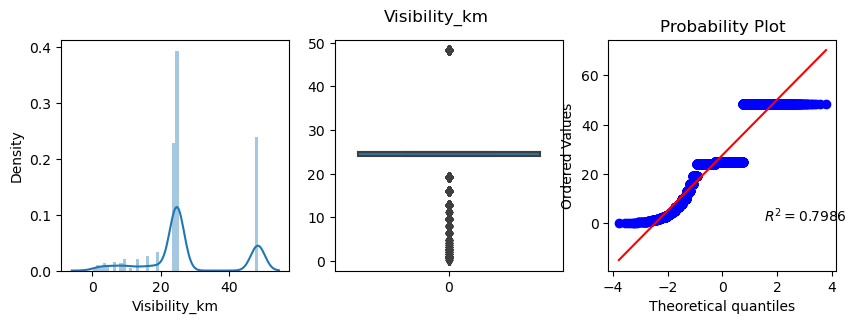

Skewness of Press_kPa: -0.22992511978286803
Kurtosis of Press_kPa: 0.7144508236613349


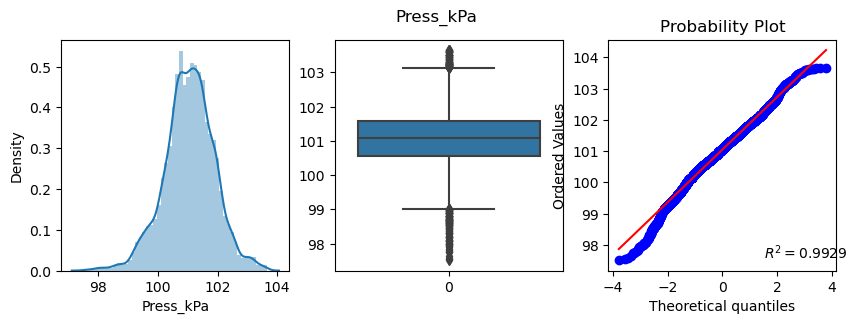

In [12]:
from scipy.stats import probplot
for col in dataframe.select_dtypes(np.number).columns:
    plt.figure(figsize=(10,3))
    print(f"Skewness of {col}:",dataframe[col].skew())
    print(f"Kurtosis of {col}:",dataframe[col].kurtosis())
    plt.subplot(131)
    sns.distplot(dataframe[col])
    plt.subplot(132)
    sns.boxplot(dataframe[col])
    plt.subplot(133)
    probplot(dataframe[col],dist='norm',rvalue=True,plot=plt)
    plt.suptitle(col)
    plt.show()

<Axes: >

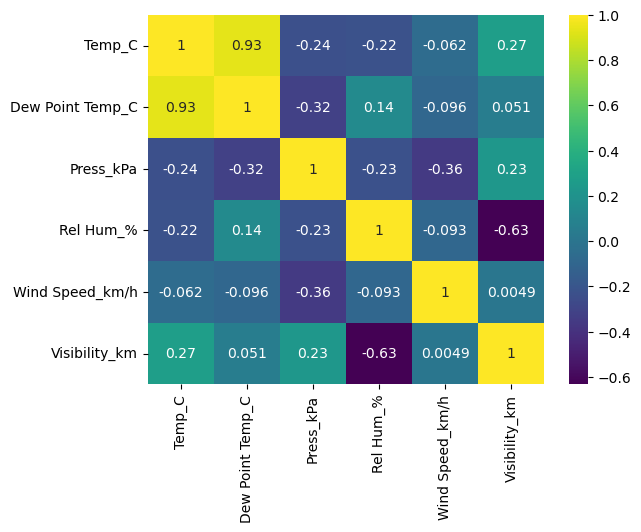

In [13]:
import seaborn as sns
df2 = dataframe[['Temp_C','Dew Point Temp_C','Press_kPa','Rel Hum_%','Wind Speed_km/h','Visibility_km']]
sns.heatmap(data= df2.corr() , annot=True , cmap='viridis' )

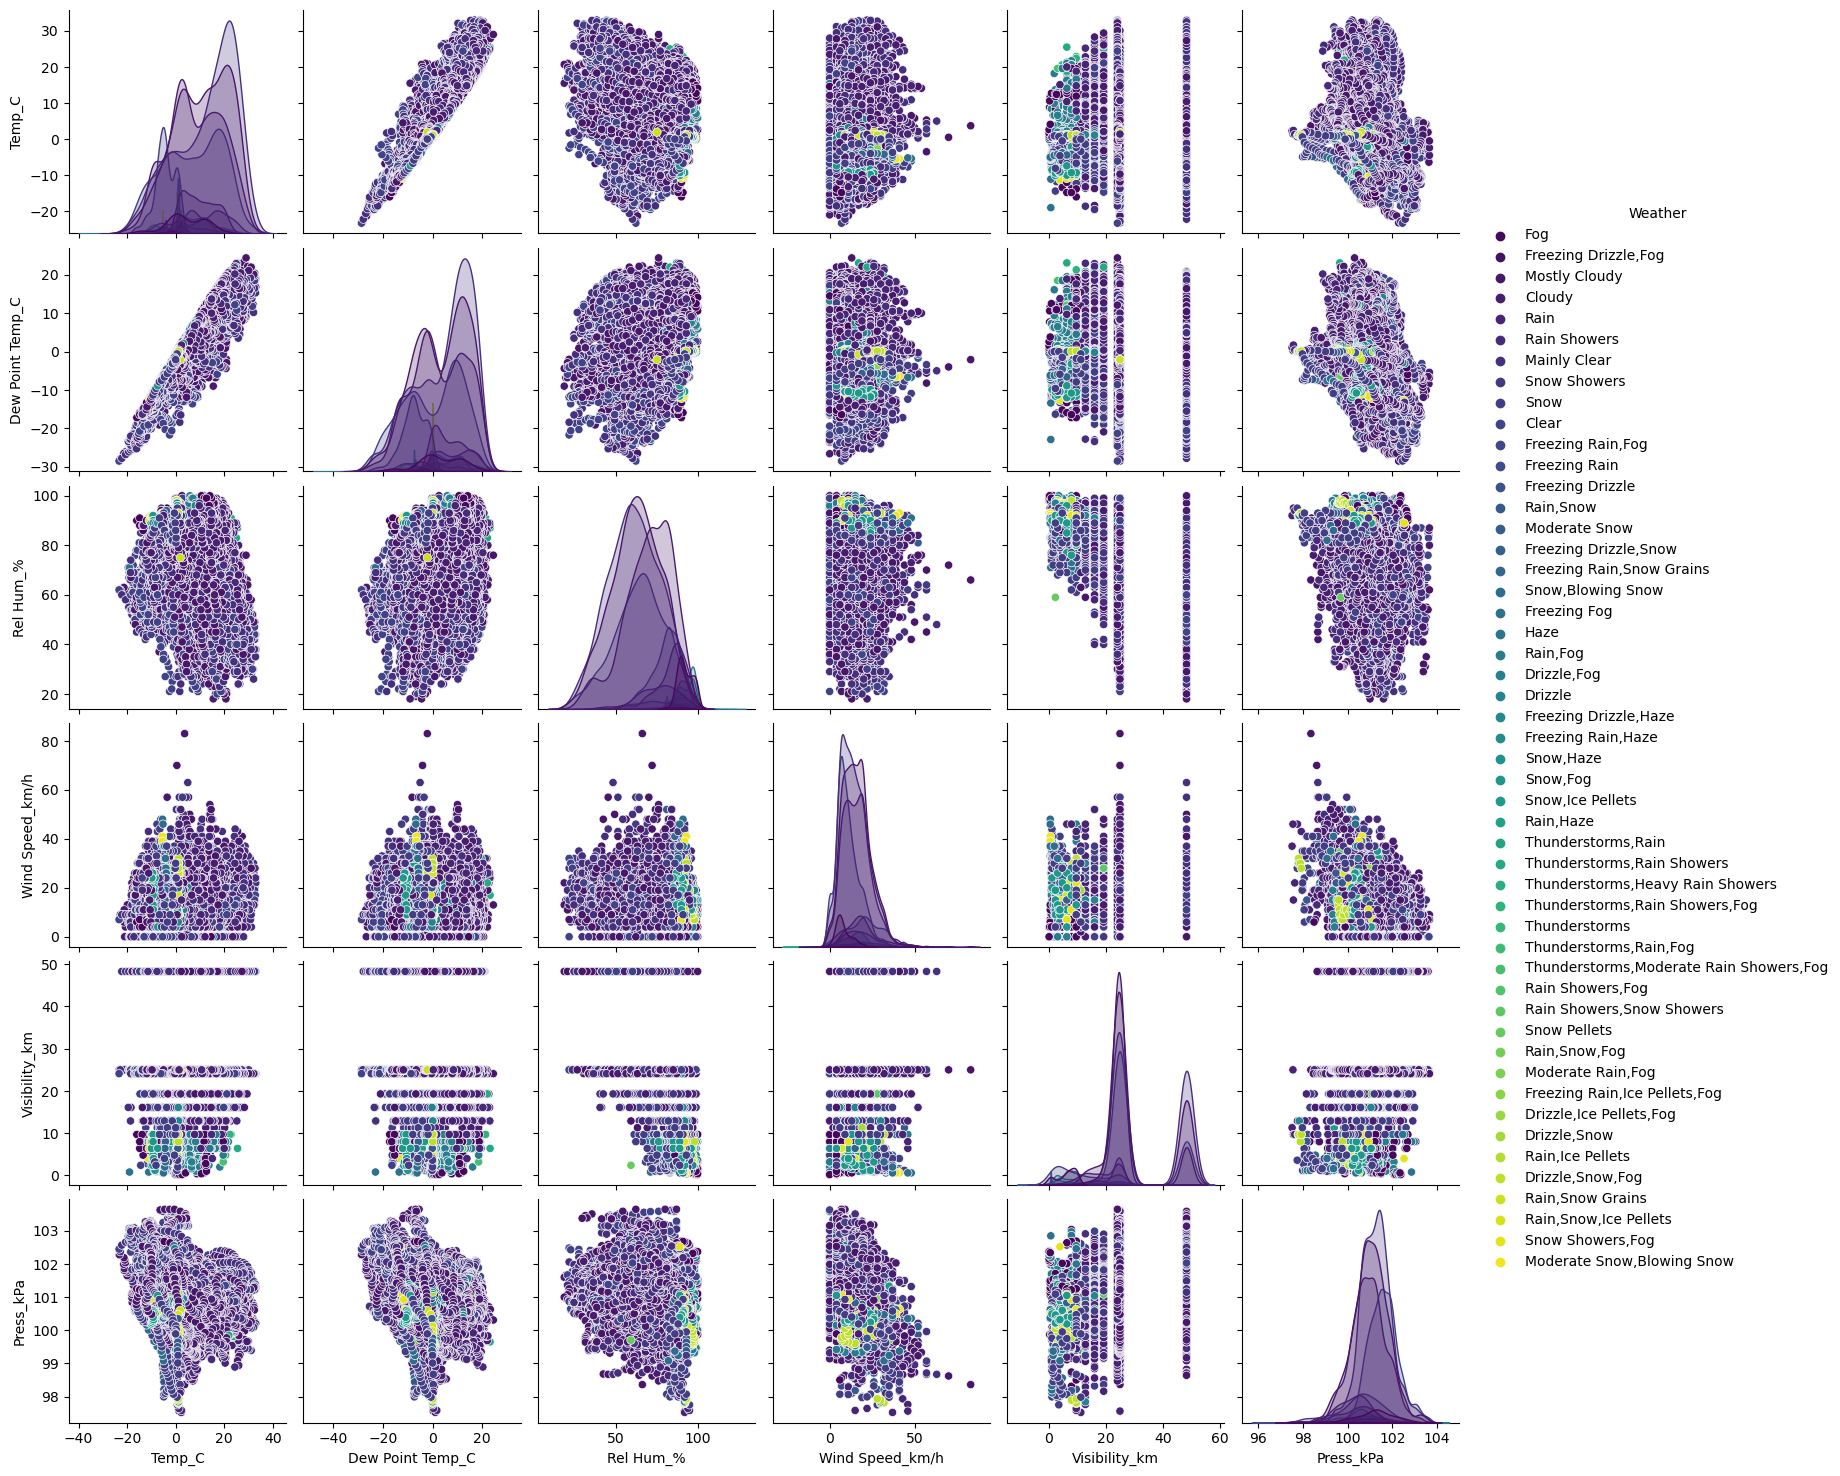

17644

In [14]:
fig = sns.pairplot(dataframe,hue='Weather',palette='viridis')
plt.show(fig)
plt.close('all')
del fig
gc.collect()

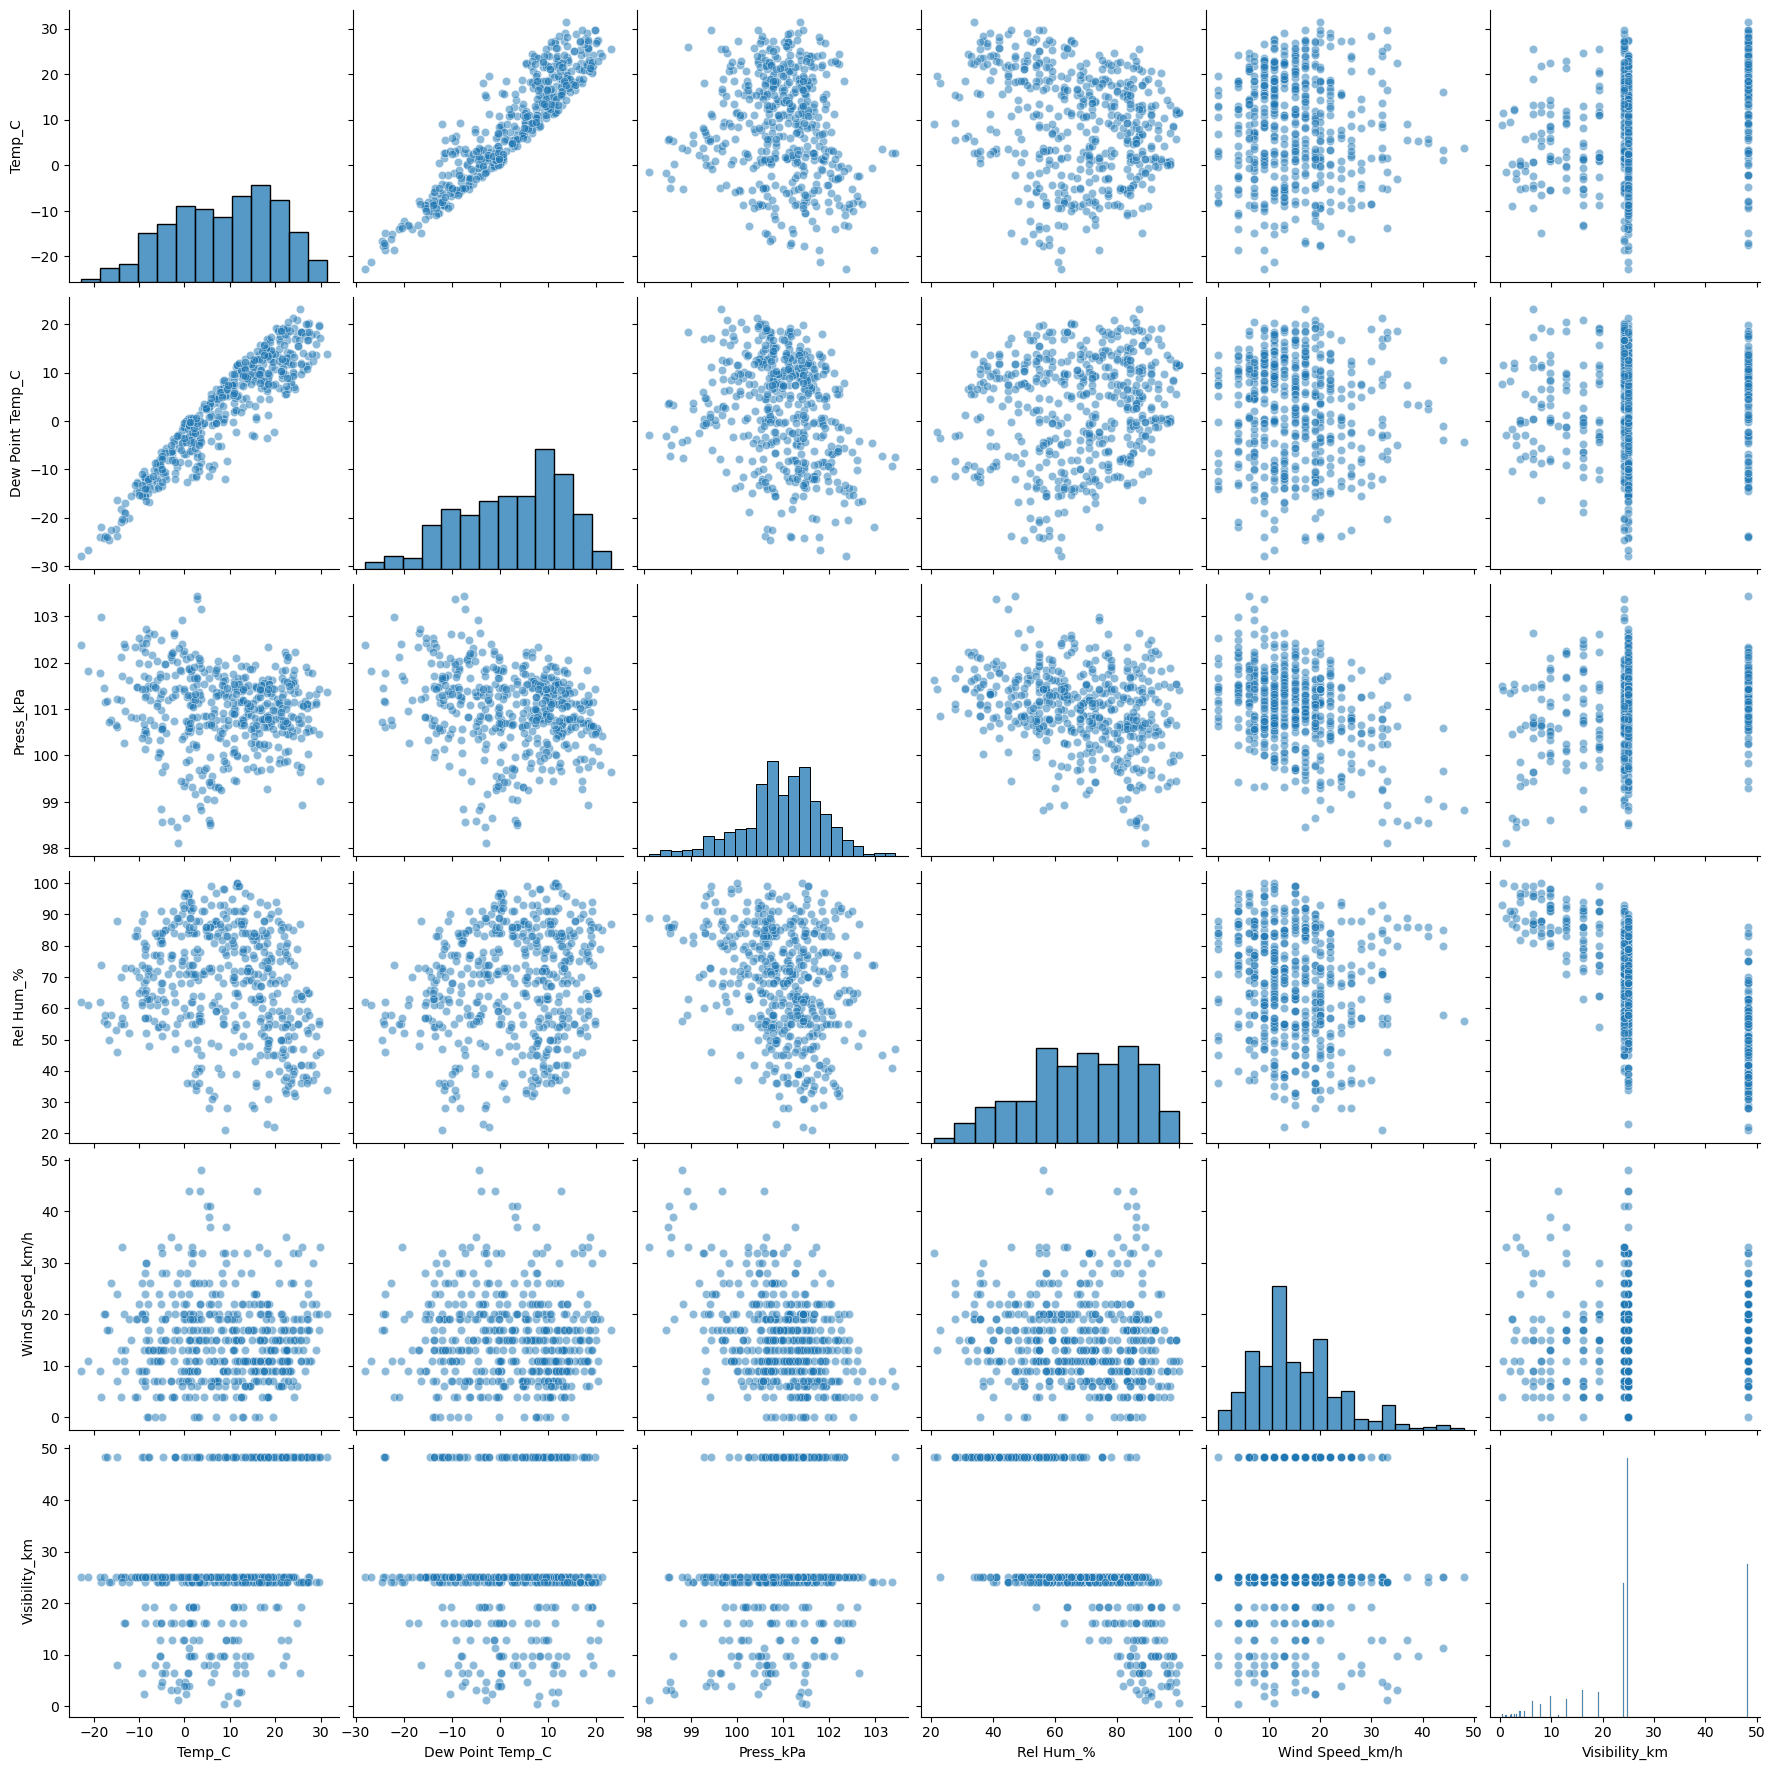

In [15]:
sns.pairplot(data=df2.sample(500), height=3, plot_kws={'alpha': 0.5}, palette='viridis')

In [16]:
weather = dataframe['Weather']

In [17]:
dataframe['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

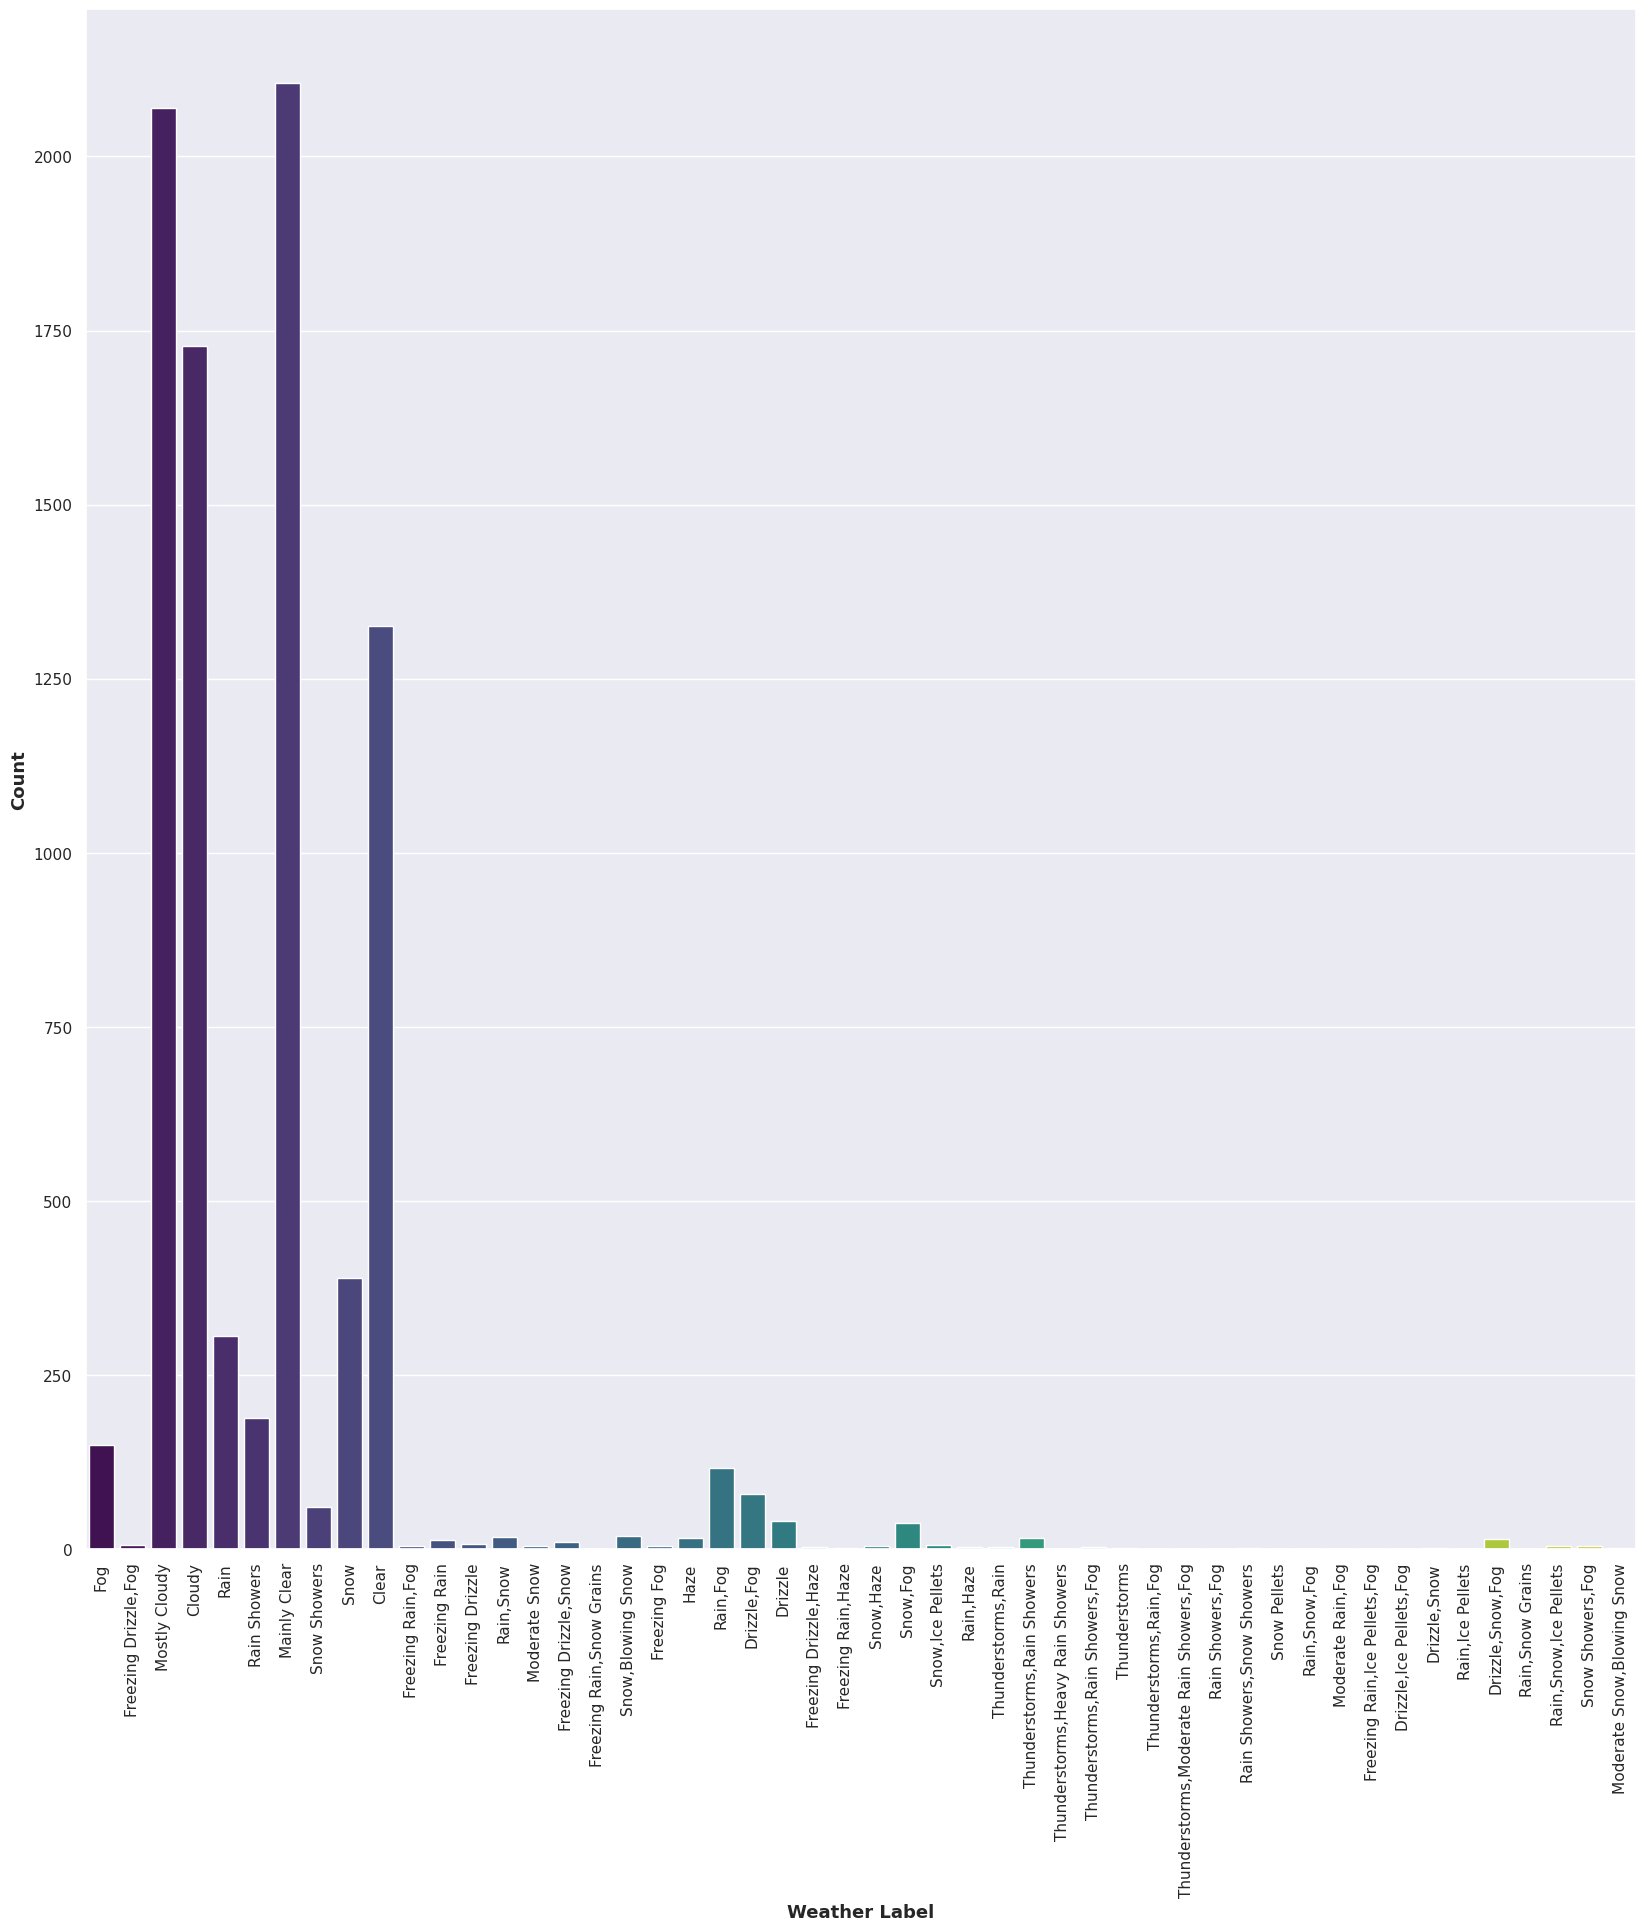

In [18]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.countplot(x = 'Weather',data = dataframe,palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [19]:
dataframe[dataframe['Weather'].str.contains('Rain')]

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
18      1/1/2012 18:00     3.8               1.0         82               15   
19      1/1/2012 19:00     3.1               1.3         88               15   
22      1/1/2012 22:00     4.4               1.9         84               24   
24       1/2/2012 0:00     5.2               1.5         77               35   
153      1/7/2012 9:00    -6.1              -8.7         82                7   
...                ...     ...               ...        ...              ...   
8537  12/21/2012 17:00     1.3               0.2         92               46   
8538  12/21/2012 18:00     1.4               0.3         92               46   
8539  12/21/2012 19:00     2.3               1.1         92               37   
8540  12/21/2012 20:00     2.4               1.7         95               15   
8541  12/21/2012 21:00     1.3               0.4         94               22   

      Visibility_km  Press_kPa            Weather  
18             12.9      99.74               Rain  
19             12.9      99.68               Rain  
22             19.3      99.32       Rain Showers  
24             25.0      99.26       Rain Showers  
153             9.7     100.15  Freezing Rain,Fog  
...             ...        ...                ...  
8537           12.9      97.76               Rain  
8538           25.0      97.56               Rain  
8539           11.3      97.52               Rain  
8540            9.7      97.58               Rain  
8541            9.7      97.64               Rain  

[689 rows x 8 columns]

In [20]:
dataframe_copy = dataframe.copy()

In [21]:
dataframe_copy

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

In [22]:
dataframe_copy.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [23]:
categories = ['Clear','Cloudy','Snow','Rain','Drizzle','Fog','HeavyRain','Haze']

dataframe_copy.Weather.replace(to_replace='Mainly Clear',value='Clear',inplace=True)
dataframe_copy.Weather.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow','Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow','Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers','Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],value='Snow',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rain',inplace=True)
dataframe_copy.Weather.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog','Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Thunderstorms,Rain Showers,Fog','Rain Showers,Fog','Thunderstorms,Moderate Rain Showers,Fog','Rain,Snow,Fog','Moderate Rain,Fog','Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog','Thunderstorms,Rain,Fog'],value='Fog',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain','Thunderstorms,Heavy Rain Showers','Thunderstorms'],value='HeavyRain',inplace=True)
dataframe_copy.Weather.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],value='Haze',inplace=True)

In [24]:
dataframe_copy.Weather.value_counts()

Weather
Cloudy       3797
Clear        3432
Snow          521
Rain          509
Fog           426
Drizzle        48
Haze           29
HeavyRain      22
Name: count, dtype: int64

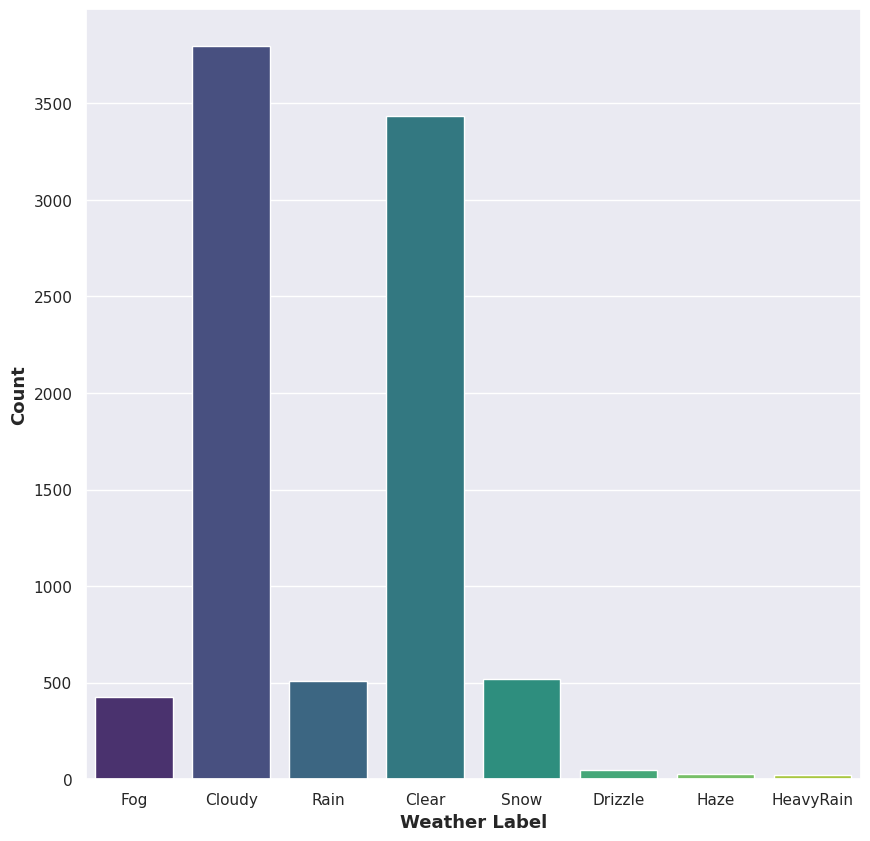

In [25]:
plt.figure(figsize=(10,10))
sns.set_theme()
sns.countplot(x = 'Weather',data = dataframe_copy,palette="viridis")
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

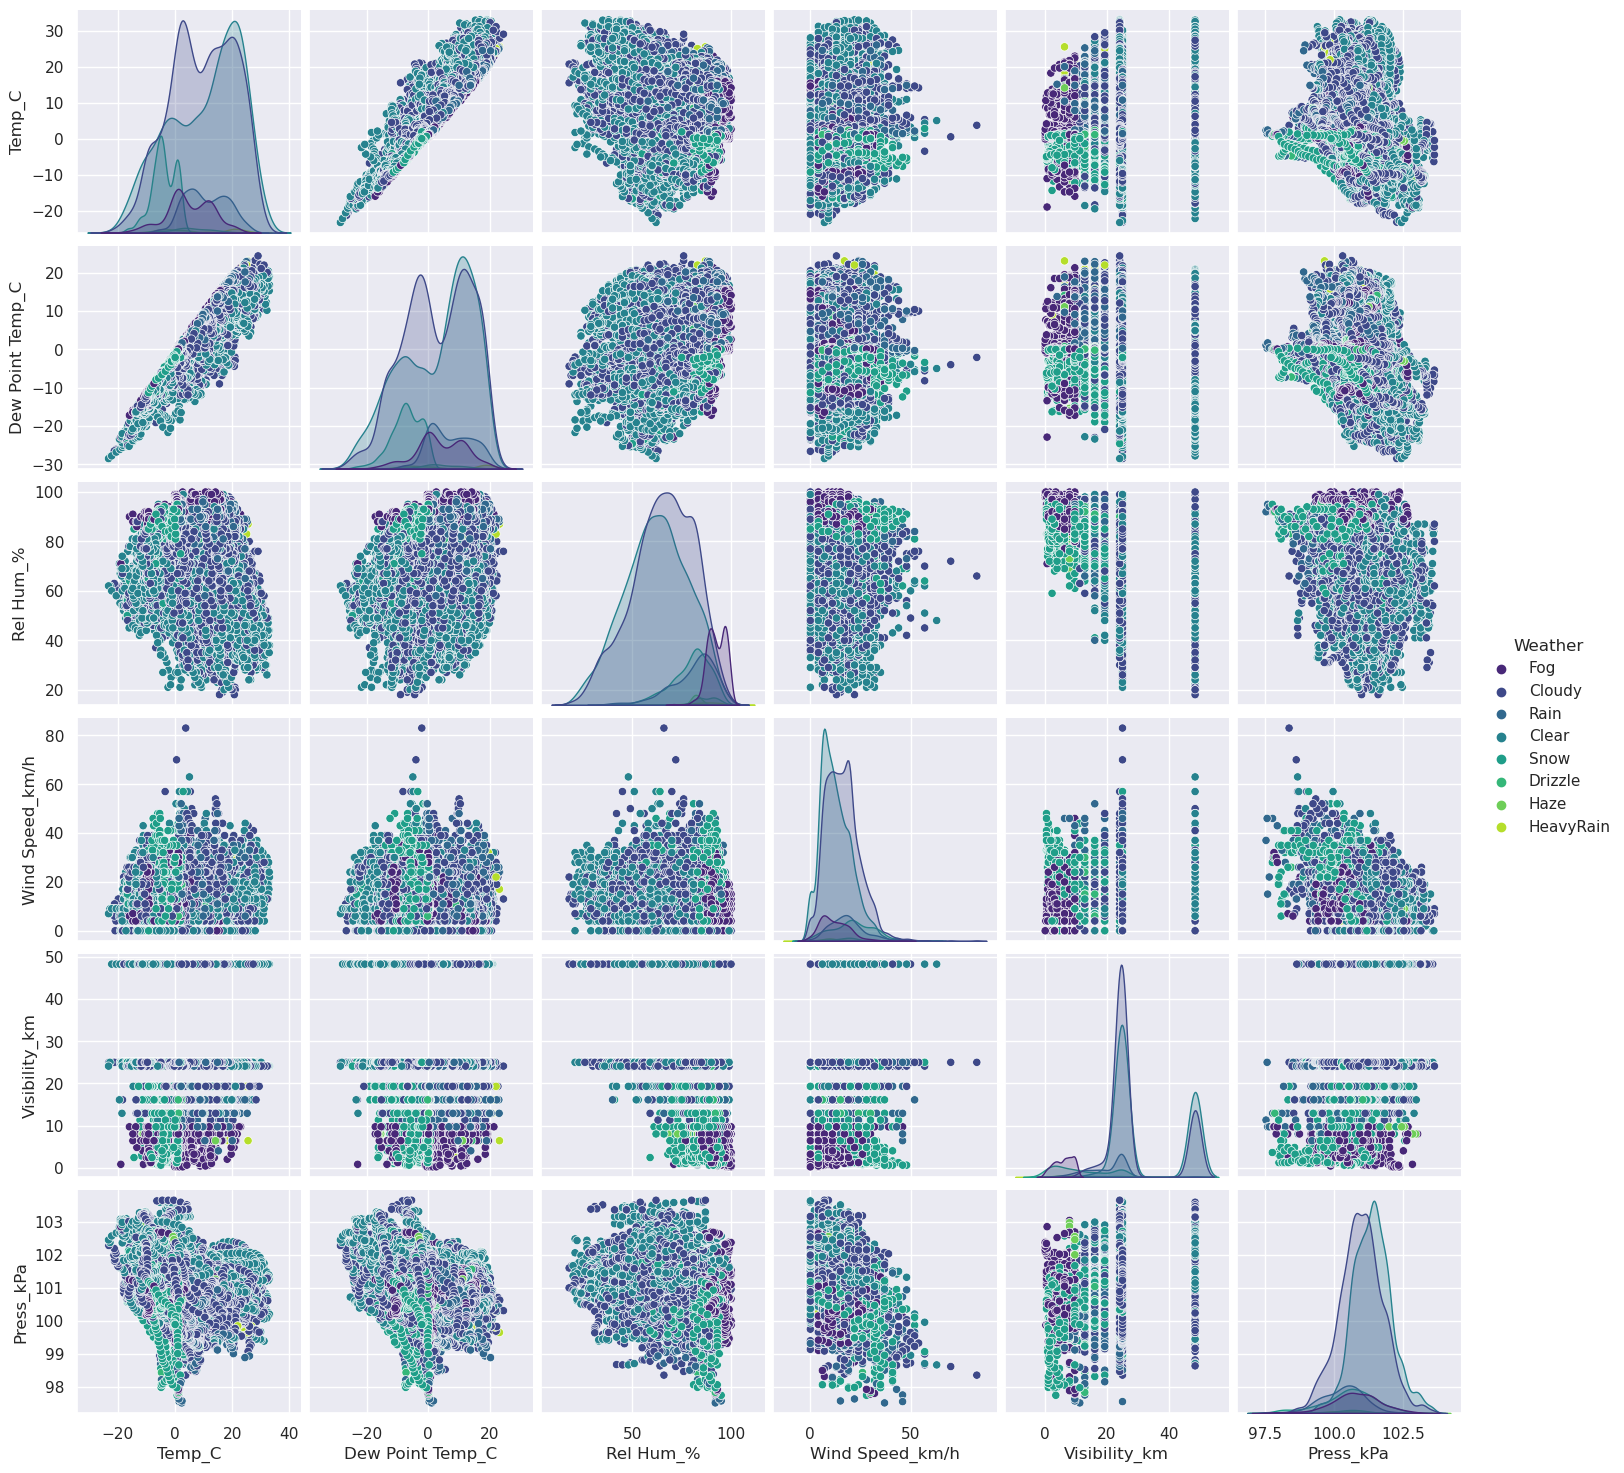

4684

In [26]:
fig = sns.pairplot(dataframe_copy,hue='Weather',palette='viridis')
plt.show(fig)
plt.close('all')
del fig
gc.collect()

## Feature Engineering

In [28]:
dataframe_copy.drop('Date/Time',axis=1,inplace=True)

In [29]:
dataframe_copy

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0       -1.8              -3.9         86                4            8.0   
1       -1.8              -3.7         87                4            8.0   
2       -1.8              -3.4         89                7            4.0   
3       -1.5              -3.2         88                6            4.0   
4       -1.5              -3.3         88                7            4.8   
...      ...               ...        ...              ...            ...   
8779     0.1              -2.7         81               30            9.7   
8780     0.2              -2.4         83               24            9.7   
8781    -0.5              -1.5         93               28            4.8   
8782    -0.2              -1.8         89               28            9.7   
8783     0.0              -2.1         86               30           11.3   

      Press_kPa Weather  
0        101.24     Fog  
1        101.24     Fog  
2        101.26     Fog  
3        101.27     Fog  
4        101.23     Fog  
...         ...     ...  
8779     100.13    Snow  
8780     100.03    Snow  
8781      99.95    Snow  
8782      99.91    Snow  
8783      99.89    Snow  

[8784 rows x 7 columns]

In [30]:
skewed_cols = ['Press_kPa','Visibility_km','Wind Speed_km/h']

def remove_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [31]:
for col in skewed_cols:
    dataframe_copy[col] = remove_outliers(dataframe_copy,col)

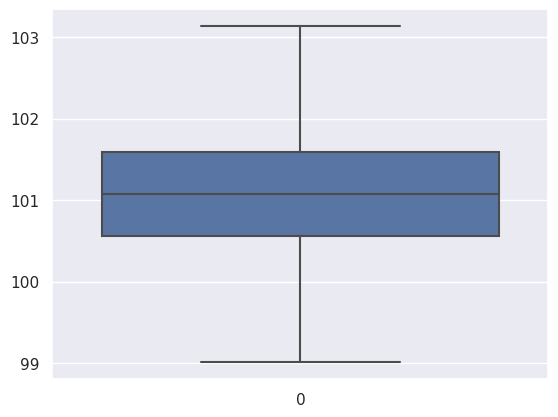

In [32]:
fig = sns.boxplot(dataframe_copy['Press_kPa'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

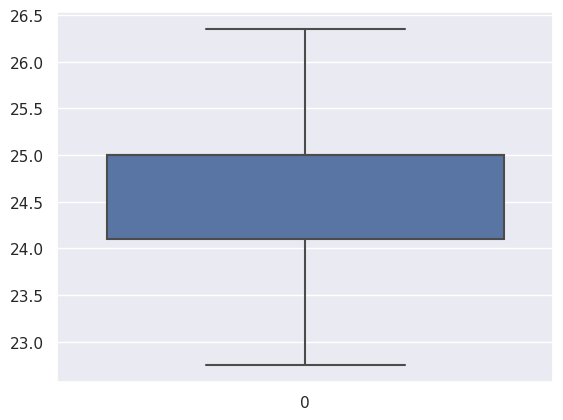

In [33]:
fig = sns.boxplot(dataframe_copy['Visibility_km'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

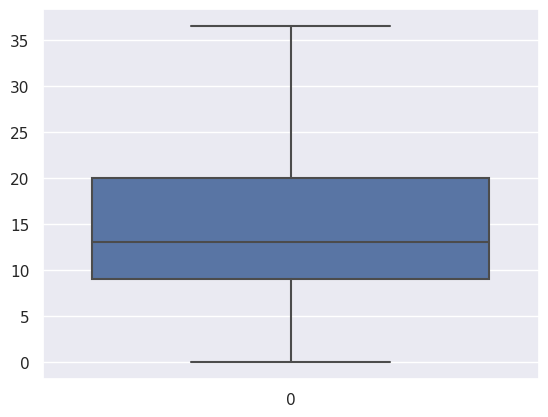

In [34]:
fig = sns.boxplot(dataframe_copy['Wind Speed_km/h'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

In [35]:
X = dataframe_copy.drop('Weather',axis=1)
y = dataframe_copy.Weather

In [161]:
X

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0     -1.800000         -3.900000         86         4.000000      22.750000   
1     -1.800000         -3.700000         87         4.000000      22.750000   
2     -1.800000         -3.400000         89         7.000000      22.750000   
3     -1.500000         -3.200000         88         6.000000      22.750000   
4     -1.500000         -3.300000         88         7.000000      22.750000   
...         ...               ...        ...              ...            ...   
30371 -0.447299         -5.169114         70        35.518354      23.240823   
30372  0.788647         -0.777838         89        18.556766      22.750000   
30373 -2.179305         -5.318157         79        20.041389      23.218625   
30374 -0.092273         -2.105402         86         0.000000      22.750000   
30375  1.859223         -2.361813         73        29.605180      23.833496   

        Press_kPa  
0      101.240000  
1      101.240000  
2      101.260000  
3      101.270000  
4      101.230000  
...           ...  
30371  100.015055  
30372   99.337453  
30373  100.969106  
30374  100.915600  
30375   99.910193  

[30376 rows x 6 columns]

In [36]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE()
X, y = borderline_smote.fit_resample(X,y)

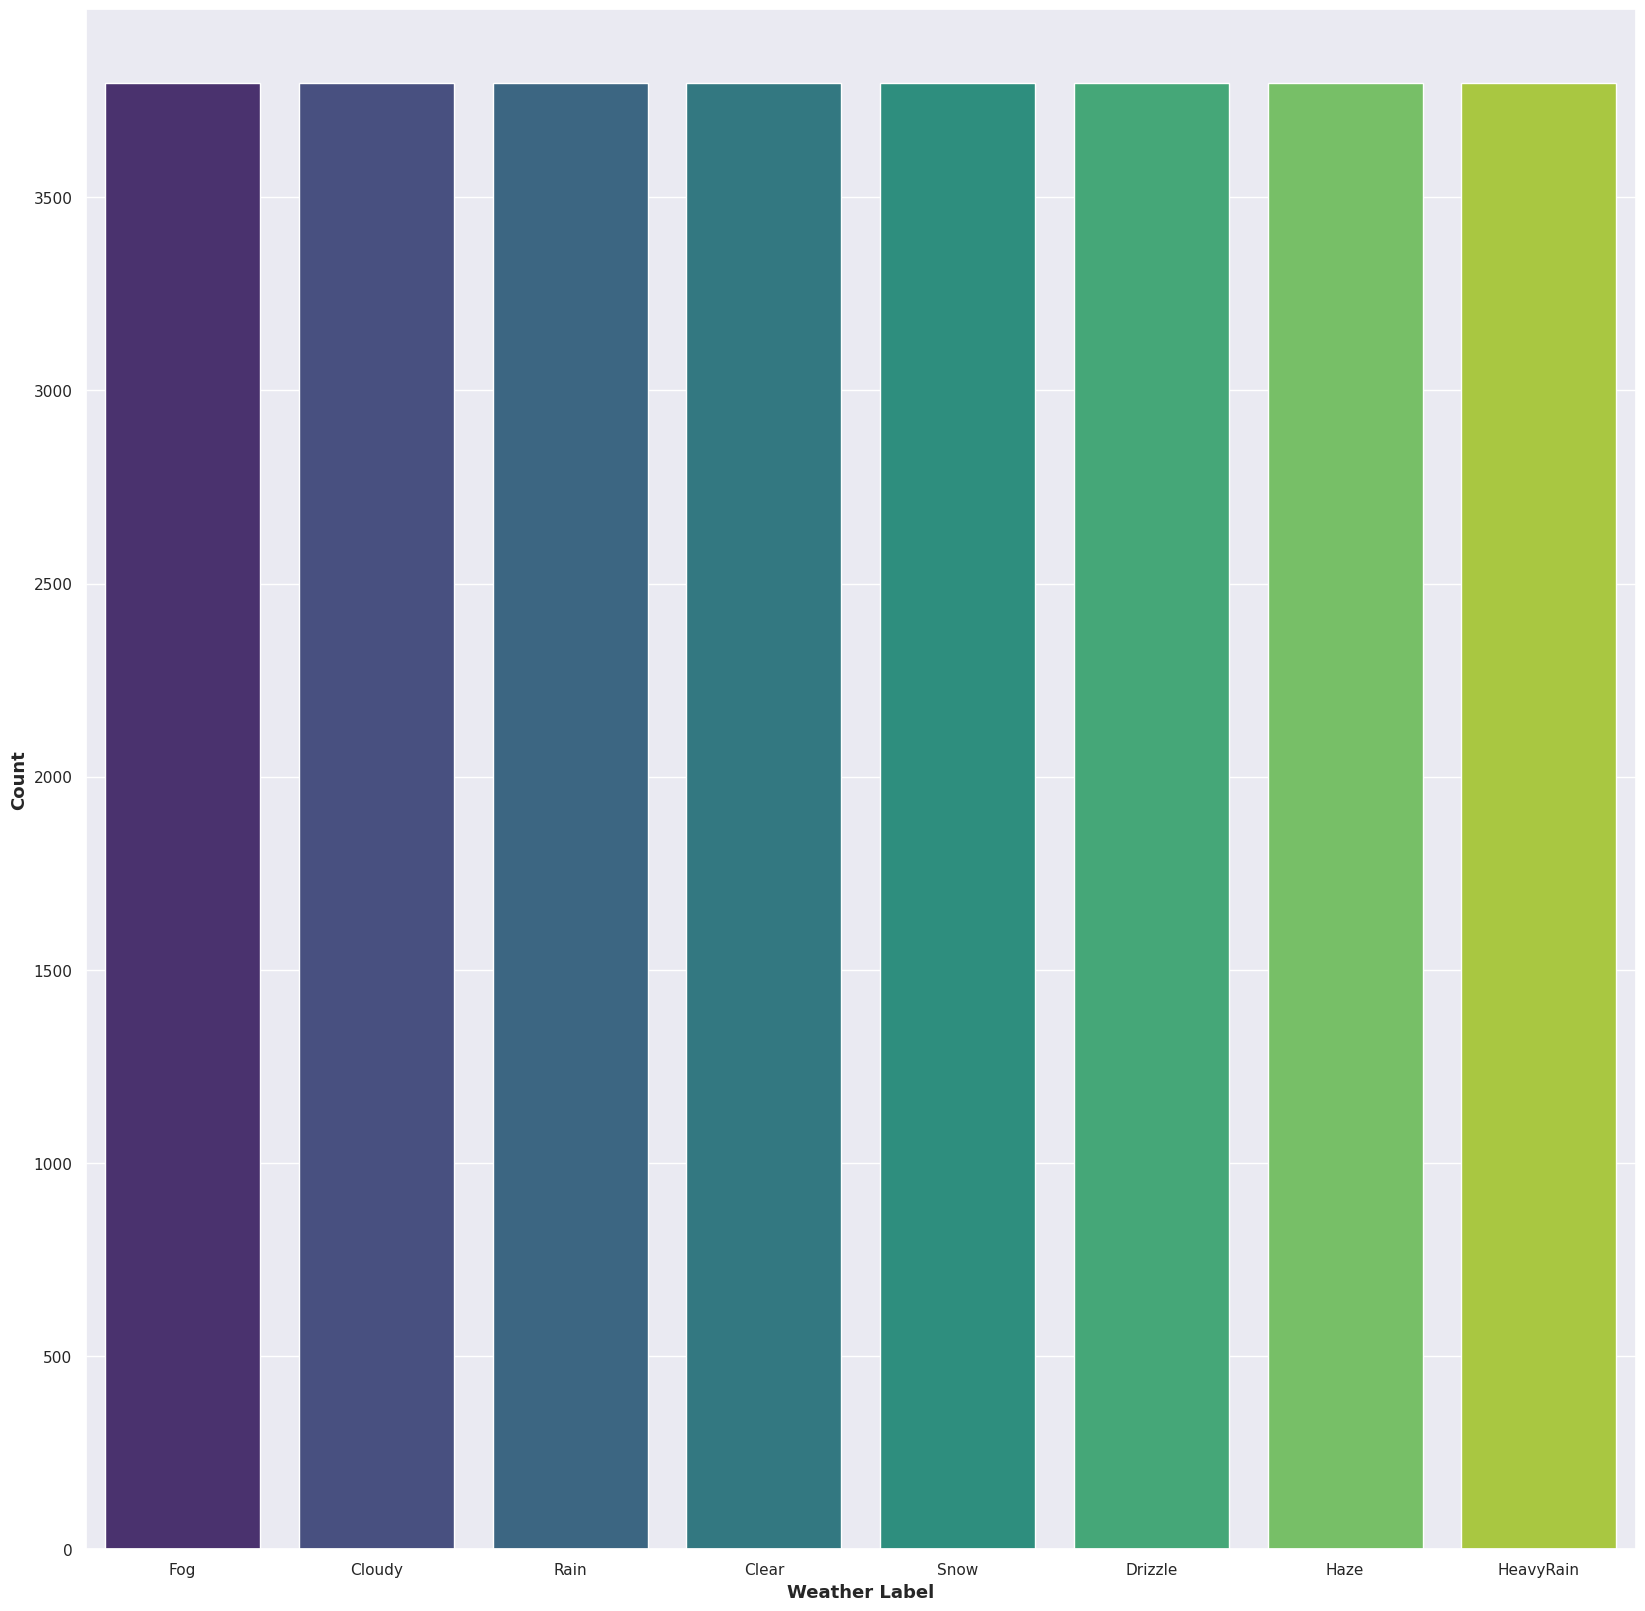

In [37]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.countplot(x = y ,data = dataframe_copy,palette="viridis")
plt.xlabel("Weather Label",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [38]:
y.value_counts()

Weather
Fog          3797
Cloudy       3797
Rain         3797
Clear        3797
Snow         3797
Drizzle      3797
Haze         3797
HeavyRain    3797
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21263, 6)
(9113, 6)
(21263,)
(9113,)


In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [42]:
encoder.classes_

array(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'HeavyRain', 'Rain',
       'Snow'], dtype=object)

In [43]:
label_mapping = {label:idx for idx, label in enumerate(encoder.classes_)}
label_mapping

{'Clear': 0,
 'Cloudy': 1,
 'Drizzle': 2,
 'Fog': 3,
 'Haze': 4,
 'HeavyRain': 5,
 'Rain': 6,
 'Snow': 7}

## Feature Selection

In [45]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [47]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
kbest = SelectKBest(k=5,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest(k=5)

In [101]:
selectedFeatures = kbest.get_feature_names_out()
featureScores = kbest.scores_
selectedFeatures

array(['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'], dtype=object)

In [129]:
featureScores

array([3117.93019993, 3214.61627957,  867.44968987, 5071.63725349,
        883.31992138])

In [147]:
from sklearn.ensemble import RandomForestClassifier
selectFrom = SelectFromModel(estimator=RandomForestClassifier(),max_features=5)
selectFrom.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=5)

In [149]:
selectedFeatures = selectFrom.get_feature_names_out()
selectedFeatures

array(['Dew Point Temp_C', 'Rel Hum_%'], dtype=object)